Number of parameters in Logistic Regression model: 215
Validation Dataset Accuracy: 0.9796


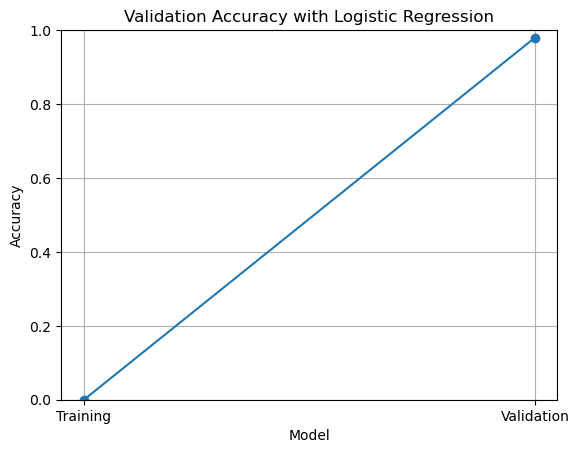

In [10]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Training Datasets
emoticons_df = pd.read_csv("datasets/train/train_emoticon.csv")
X_emoticons = emoticons_df.iloc[:, :-1].values
y = emoticons_df['label'].values

deep_features_data = np.load("datasets/train/train_feature.npz", allow_pickle=True)
X_deep_features = deep_features_data['features']
y_deep = deep_features_data['label']

text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
X_text_seq = text_seq_df['input_str'].values
y_text = text_seq_df['label'].values

# 2. Preprocess the Training Datasets
# 2.1. Emoticon Dataset - OneHotEncode categorical emoticons
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_emoticons_encoded = encoder.fit_transform(X_emoticons)

# 2.2. Deep Features Dataset - Flatten and scale
train_features_flattened = X_deep_features.reshape(X_deep_features.shape[0], -1)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flattened)

# 2.3. Text Sequence Dataset - Convert to TF-IDF matrix
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Using character-level n-grams
X_text_seq_encoded = vectorizer.fit_transform(X_text_seq).toarray()

# Concatenate all training features
X_combined = np.concatenate([X_emoticons_encoded, train_features_scaled, X_text_seq_encoded], axis=1)

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_combined_pca = pca.fit_transform(X_combined)

# Train the model on the entire training dataset using Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_combined_pca, y)

# Display number of parameters (coefficients)
num_parameters = model.coef_.size
print(f"Number of parameters in Logistic Regression model: {num_parameters}")

# 4. Load the Validation Datasets
emoticons_val_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
X_emoticons_val = emoticons_val_df.iloc[:, :-1].values
y_val = emoticons_val_df['label'].values

deep_features_val_data = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
X_deep_features_val = deep_features_val_data['features']

text_seq_val_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
X_text_seq_val = text_seq_val_df['input_str'].values

# 5. Preprocess the Validation Datasets
# 5.1. Emoticon Validation Dataset - OneHotEncode with the same encoder from training
X_emoticons_val_encoded = encoder.transform(X_emoticons_val)

# 5.2. Deep Features Validation Dataset - Flatten and scale using the same scaler
val_features_flattened = X_deep_features_val.reshape(X_deep_features_val.shape[0], -1)
val_features_scaled = scaler.transform(val_features_flattened)

# 5.3. Text Sequence Validation Dataset - Convert to TF-IDF matrix using the same vectorizer
X_text_seq_val_encoded = vectorizer.transform(X_text_seq_val).toarray()

# Concatenate all validation features
X_val_combined = np.concatenate([X_emoticons_val_encoded, val_features_scaled, X_text_seq_val_encoded], axis=1)

# Apply PCA to the validation set using the same transformation
X_val_combined_pca = pca.transform(X_val_combined)

# 6. Evaluate the Model on the Validation Dataset
y_val_pred = model.predict(X_val_combined_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Dataset Accuracy: {val_accuracy:.4f}')

# Plot accuracy
plt.plot([1, 2], [0, val_accuracy], marker='o')
plt.title('Validation Accuracy with Logistic Regression')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([1, 2], ['Training', 'Validation'])
plt.ylim(0, 1)
plt.grid()
plt.show()


Number of support vectors in SVM model: 1841
Validation Dataset Accuracy: 0.9877


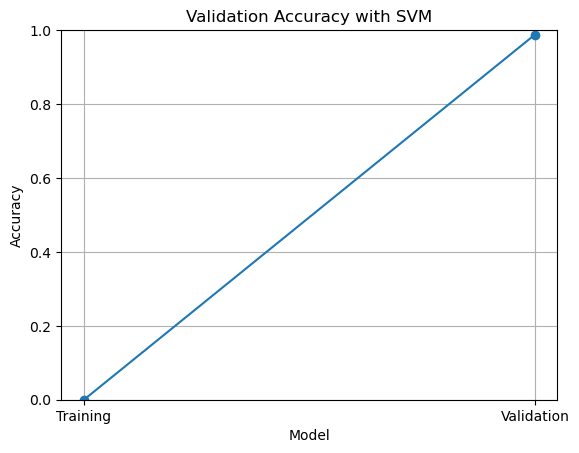

In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Training Datasets
emoticons_df = pd.read_csv("datasets/train/train_emoticon.csv")
X_emoticons = emoticons_df.iloc[:, :-1].values
y = emoticons_df['label'].values

deep_features_data = np.load("datasets/train/train_feature.npz", allow_pickle=True)
X_deep_features = deep_features_data['features']
y_deep = deep_features_data['label']

text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
X_text_seq = text_seq_df['input_str'].values
y_text = text_seq_df['label'].values

# 2. Preprocess the Training Datasets
# 2.1. Emoticon Dataset - OneHotEncode categorical emoticons
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_emoticons_encoded = encoder.fit_transform(X_emoticons)

# 2.2. Deep Features Dataset - Flatten and scale
train_features_flattened = X_deep_features.reshape(X_deep_features.shape[0], -1)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flattened)

# 2.3. Text Sequence Dataset - Convert to TF-IDF matrix
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Using character-level n-grams
X_text_seq_encoded = vectorizer.fit_transform(X_text_seq).toarray()

# Concatenate all training features
X_combined = np.concatenate([X_emoticons_encoded, train_features_scaled, X_text_seq_encoded], axis=1)

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_combined_pca = pca.fit_transform(X_combined)

# Train the model on the entire training dataset using SVM
model = SVC()  # Using SVC as the SVM model
model.fit(X_combined_pca, y)

# Display number of support vectors
num_support_vectors = model.support_vectors_.shape[0]
print(f"Number of support vectors in SVM model: {num_support_vectors}")

# 4. Load the Validation Datasets
emoticons_val_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
X_emoticons_val = emoticons_val_df.iloc[:, :-1].values
y_val = emoticons_val_df['label'].values

deep_features_val_data = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
X_deep_features_val = deep_features_val_data['features']

text_seq_val_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
X_text_seq_val = text_seq_val_df['input_str'].values

# 5. Preprocess the Validation Datasets
# 5.1. Emoticon Validation Dataset - OneHotEncode with the same encoder from training
X_emoticons_val_encoded = encoder.transform(X_emoticons_val)

# 5.2. Deep Features Validation Dataset - Flatten and scale using the same scaler
val_features_flattened = X_deep_features_val.reshape(X_deep_features_val.shape[0], -1)
val_features_scaled = scaler.transform(val_features_flattened)

# 5.3. Text Sequence Validation Dataset - Convert to TF-IDF matrix using the same vectorizer
X_text_seq_val_encoded = vectorizer.transform(X_text_seq_val).toarray()

# Concatenate all validation features
X_val_combined = np.concatenate([X_emoticons_val_encoded, val_features_scaled, X_text_seq_val_encoded], axis=1)

# Apply PCA to the validation set using the same transformation
X_val_combined_pca = pca.transform(X_val_combined)

# 6. Evaluate the Model on the Validation Dataset
y_val_pred = model.predict(X_val_combined_pca)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Dataset Accuracy: {val_accuracy:.4f}')

# Plot accuracy
plt.plot([1, 2], [0, val_accuracy], marker='o')
plt.title('Validation Accuracy with SVM')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([1, 2], ['Training', 'Validation'])
plt.ylim(0, 1)
plt.grid()
plt.show()


Validation Dataset Accuracy with KNN: 0.9325


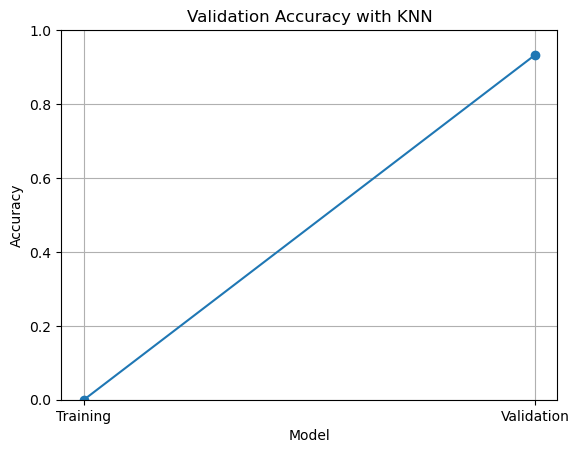

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Training Datasets
emoticons_df = pd.read_csv("datasets/train/train_emoticon.csv")
X_emoticons = emoticons_df.iloc[:, :-1].values
y = emoticons_df['label'].values

deep_features_data = np.load("datasets/train/train_feature.npz", allow_pickle=True)
X_deep_features = deep_features_data['features']
y_deep = deep_features_data['label']

text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
X_text_seq = text_seq_df['input_str'].values
y_text = text_seq_df['label'].values

# 2. Preprocess the Training Datasets
# 2.1. Emoticon Dataset - OneHotEncode categorical emoticons
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_emoticons_encoded = encoder.fit_transform(X_emoticons)

# 2.2. Deep Features Dataset - Flatten and scale
train_features_flattened = X_deep_features.reshape(X_deep_features.shape[0], -1)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flattened)

# 2.3. Text Sequence Dataset - Convert to TF-IDF matrix
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Using character-level n-grams
X_text_seq_encoded = vectorizer.fit_transform(X_text_seq).toarray()

# Concatenate all training features
X_combined = np.concatenate([X_emoticons_encoded, train_features_scaled, X_text_seq_encoded], axis=1)

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_combined_pca = pca.fit_transform(X_combined)

# Train the model using KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Using 5 neighbors (default)
knn_model.fit(X_combined_pca, y)

# 4. Load the Validation Datasets
emoticons_val_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
X_emoticons_val = emoticons_val_df.iloc[:, :-1].values
y_val = emoticons_val_df['label'].values

deep_features_val_data = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
X_deep_features_val = deep_features_val_data['features']

text_seq_val_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
X_text_seq_val = text_seq_val_df['input_str'].values

# 5. Preprocess the Validation Datasets
# 5.1. Emoticon Validation Dataset - OneHotEncode with the same encoder from training
X_emoticons_val_encoded = encoder.transform(X_emoticons_val)

# 5.2. Deep Features Validation Dataset - Flatten and scale using the same scaler
val_features_flattened = X_deep_features_val.reshape(X_deep_features_val.shape[0], -1)
val_features_scaled = scaler.transform(val_features_flattened)

# 5.3. Text Sequence Validation Dataset - Convert to TF-IDF matrix using the same vectorizer
X_text_seq_val_encoded = vectorizer.transform(X_text_seq_val).toarray()

# Concatenate all validation features
X_val_combined = np.concatenate([X_emoticons_val_encoded, val_features_scaled, X_text_seq_val_encoded], axis=1)

# Apply PCA to the validation set using the same transformation
X_val_combined_pca = pca.transform(X_val_combined)

# 6. Evaluate the Model on the Validation Dataset
y_val_pred_knn = knn_model.predict(X_val_combined_pca)
val_accuracy_knn = accuracy_score(y_val, y_val_pred_knn)
print(f'Validation Dataset Accuracy with KNN: {val_accuracy_knn:.4f}')

# Plot accuracy
plt.plot([1, 2], [0, val_accuracy_knn], marker='o')
plt.title('Validation Accuracy with KNN')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks([1, 2], ['Training', 'Validation'])
plt.ylim(0, 1)
plt.grid()
plt.show()

Percentage: 20%, Validation Accuracy: 0.9693
Percentage: 40%, Validation Accuracy: 0.9796
Percentage: 60%, Validation Accuracy: 0.9836
Percentage: 80%, Validation Accuracy: 0.9918
Percentage: 100%, Validation Accuracy: 0.9877


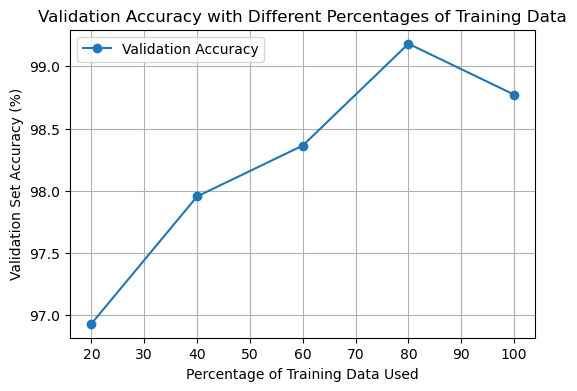

In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC  # Import SVM
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 1. Load the Training Datasets
emoticons_df = pd.read_csv("datasets/train/train_emoticon.csv")
X_emoticons = emoticons_df.iloc[:, :-1].values
y = emoticons_df['label'].values

deep_features_data = np.load("datasets/train/train_feature.npz", allow_pickle=True)
X_deep_features = deep_features_data['features']
y_deep = deep_features_data['label']

text_seq_df = pd.read_csv("datasets/train/train_text_seq.csv")
X_text_seq = text_seq_df['input_str'].values
y_text = text_seq_df['label'].values

# 2. Preprocess the Training Datasets
# 2.1. Emoticon Dataset - OneHotEncode categorical emoticons
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_emoticons_encoded = encoder.fit_transform(X_emoticons)

# 2.2. Deep Features Dataset - Flatten and scale
train_features_flattened = X_deep_features.reshape(X_deep_features.shape[0], -1)
scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features_flattened)

# 2.3. Text Sequence Dataset - Convert to TF-IDF matrix
vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(1, 2))  # Using character-level n-grams
X_text_seq_encoded = vectorizer.fit_transform(X_text_seq).toarray()

# Concatenate all training features
X_combined = np.concatenate([X_emoticons_encoded, train_features_scaled, X_text_seq_encoded], axis=1)

# 3. Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_combined_pca = pca.fit_transform(X_combined)

# Load the Validation Datasets
emoticons_val_df = pd.read_csv("datasets/valid/valid_emoticon.csv")
X_emoticons_val = emoticons_val_df.iloc[:, :-1].values
y_val = emoticons_val_df['label'].values

deep_features_val_data = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
X_deep_features_val = deep_features_val_data['features']

text_seq_val_df = pd.read_csv("datasets/valid/valid_text_seq.csv")
X_text_seq_val = text_seq_val_df['input_str'].values

# Preprocess the Validation Datasets
# 5.1. Emoticon Validation Dataset - OneHotEncode with the same encoder from training
X_emoticons_val_encoded = encoder.transform(X_emoticons_val)

# 5.2. Deep Features Validation Dataset - Flatten and scale using the same scaler
val_features_flattened = X_deep_features_val.reshape(X_deep_features_val.shape[0], -1)
val_features_scaled = scaler.transform(val_features_flattened)

# 5.3. Text Sequence Validation Dataset - Convert to TF-IDF matrix using the same vectorizer
X_text_seq_val_encoded = vectorizer.transform(X_text_seq_val).toarray()

# Concatenate all validation features
X_val_combined = np.concatenate([X_emoticons_val_encoded, val_features_scaled, X_text_seq_val_encoded], axis=1)

# Apply PCA to the validation set using the same transformation
X_val_combined_pca = pca.transform(X_val_combined)

# List of percentages of training data to use
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]
val_accuracies = []

# 6. Train the model on different percentages of training data
for p in percentages:
    # Calculate the number of samples to use
    n_samples = int(len(X_combined_pca) * p)

    # Subset the training data based on the percentage
    X_subset = X_combined_pca[:n_samples]
    y_subset = y[:n_samples]

    # Train the model using SVM
    model = SVC()
    model.fit(X_subset, y_subset)

    # Evaluate the model on the validation data
    y_val_pred = model.predict(X_val_combined_pca)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(val_accuracy)

    print(f"Percentage: {int(p*100)}%, Validation Accuracy: {val_accuracy:.4f}")

# 7. Plot validation accuracy for each percentage of training data used
plt.figure(figsize=(6, 4))
plt.plot([int(p*100) for p in percentages], [acc*100 for acc in val_accuracies], marker='o', label='Validation Accuracy')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Set Accuracy (%)')
plt.title('Validation Accuracy with Different Percentages of Training Data')
plt.grid()
plt.legend()
plt.show()


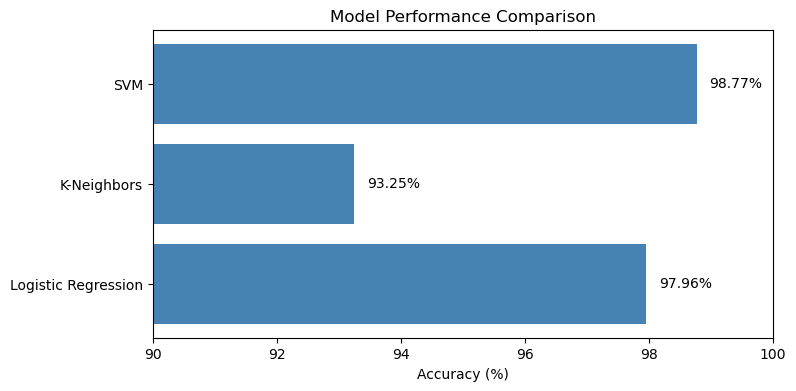

In [4]:
import matplotlib.pyplot as plt

# Data for the models and their corresponding accuracies
models = ['Logistic Regression', 'K-Neighbors', 'SVM']
accuracies = [97.96, 93.25, 98.77]

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(models, accuracies, color='steelblue')
plt.xlabel('Accuracy (%)')
plt.title('Model Performance Comparison')

# Add accuracy values next to the bars
for index, value in enumerate(accuracies):
    plt.text(value + 0.2, index, f"{value:.2f}%", va='center')

# Display the plot
plt.xlim(90, 100)  # Adjusting the x-axis limit for better view
plt.show()
